In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
AQ = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')#read data
dic = {1: "Winter",
       2: "Winter",
       3: "Spring",
       4: "Spring",
       5: "Spring",
       6: "Summer",
       7: "Summer",
       8: "Summer",
       9: "Fall",
       10: "Fall",
       11: "Fall",
       12: "Winter"}
AQ['season'] = AQ['month'].map(dic)
AQ = AQ.dropna()
AQ = AQ[AQ['pm2.5'] > 0] #remove unresonable response values
AQ['pm25_log'] = np.log(AQ['pm2.5']) #do the log transformation on the response variable
# remove the outliers
AQ_cv = AQ[AQ['cbwd'] == 'cv']
AQ_cv = AQ_cv[(AQ_cv['pm25_log'] > 2.2) & (AQ_cv['pm25_log'] < 6.8)]
AQ_NE = AQ[AQ['cbwd'] == 'NE']
AQ_NE = AQ_NE[(AQ_NE['pm25_log'] > 0.5)]
AQ_NW = AQ[AQ['cbwd'] == 'NW']
AQ_NW = AQ_NW[(AQ_NW['pm25_log'] > 0.5)]
AQ_SE = AQ[AQ['cbwd'] == 'SE']
AQ_SE.sort_values(['pm25_log'], ascending=[False])
AQ_SE = AQ_SE[(AQ_SE['pm25_log'] > 0.5) & (AQ_SE['pm25_log'] < 6.291569)]
AQ_new = pd.concat([AQ_cv, AQ_NE, AQ_NW, AQ_SE])

In [3]:
#fit the model
mixed = smf.mixedlm("pm25_log ~ year+month+day+hour+DEWP+TEMP+PRES+Is+Ir", AQ_new, groups = AQ_new["cbwd"], re_formula="~hour+PRES")
mixed_fit = mixed.fit()
#print the summary
print(mixed_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  pm25_log   
No. Observations:    41615    Method:              REML       
No. Groups:          4        Scale:               0.6164     
Min. group size:     4755     Likelihood:          -49083.3733
Max. group size:     14562    Converged:           Yes        
Mean group size:     10403.8                                  
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         38.066    7.714    4.935 0.000 22.947 53.185
year              -0.007    0.003   -2.486 0.013 -0.012 -0.001
month             -0.022    0.001  -18.286 0.000 -0.024 -0.019
day                0.006    0.000   14.789 0.000  0.006  0.007
hour               0.012    0.059    0.212 0.832 -0.102  0.127
DEWP               0.061    0.001  109.961 0.000  0.060  0.062
TEMP 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


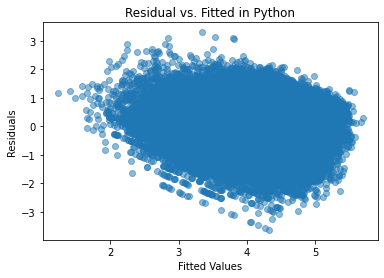

In [8]:
import matplotlib.pyplot as plt

plt.scatter(AQ_new['pm25_log'] - mixed_fit.resid, mixed_fit.resid, alpha = 0.5)
plt.title("Residual vs. Fitted in Python")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.savefig('python_plot.png',dpi=300)
plt.show()